<a href="https://colab.research.google.com/github/austinkirwin/public-projects/blob/main/Python_projects/Alzheimers_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alzheimer's Predictions

Alzheimer's is still uncureable and many people suffer because of its effects on themselves and their loved ones. In this analysis I will be utilizing a data set from [Kaggle](https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global) in order to predict Alzheimer's based on a multitude of factors. Predicting Alzheimer's allows people to prepare themselves for the worst case scenario through screening and such for early detection.

### Imports

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### Reading in our dataset

**Note:** Since the dataset provided did not include a GitHub, I downloaded the .csv file and will use the following code to upload the file by selecting it from my local machine.

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  alzheimers_data = pd.read_csv(fn)

Saving alzheimers_prediction_dataset.csv to alzheimers_prediction_dataset.csv


In [3]:
# Preview the data
alzheimers_data.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


### Creating the training and test data

In [4]:
alzheimers_data_encoded = pd.get_dummies(alzheimers_data, dtype = int) # Because our data has many qualitative variables, they need to be one-hot encoded to ensure our neural network runs properly

In [5]:
# Since we only need either "Alzheimer's Diagnosis_No" or "Alzheimer's Diagnosis_Yes"... I will be dropping "Alzheimer's Diagnosis_No" from the data sets

alzheimers_data_encoded = alzheimers_data_encoded.drop("Alzheimer’s Diagnosis_No", axis = 1)


# Now I will separate the explanatory variables with what we actually want to predict i.e. the alzheimer's diagnosis

alzheimer_expvar = alzheimers_data_encoded.drop("Alzheimer’s Diagnosis_Yes", axis = 1)
diagnosis = alzheimers_data_encoded['Alzheimer’s Diagnosis_Yes']

In [6]:
alzheimer_train_expvar, alzheimer_test_expvar, diagnosis_train, diagnosis_test = train_test_split(alzheimer_expvar, diagnosis, test_size=.2, random_state=10) # splitting the data into a training and test data set
alzheimer_train_expvar

,Age,Education Level,BMI,Cognitive Test Score,Country_Argentina,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,...,Social Engagement Level_Low,Social Engagement Level_Medium,Income Level_High,Income Level_Low,Income Level_Medium,Stress Levels_High,Stress Levels_Low,Stress Levels_Medium,Urban vs Rural Living_Rural,Urban vs Rural Living_Urban
2968,50,4,19.6,87,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
70623,64,19,27.1,41,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
37340,84,1,25.7,33,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
55130,87,16,20.3,52,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
17358,77,16,33.0,91,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17904,64,6,30.8,41,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
37597,76,6,27.7,51,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
10201,82,0,25.6,72,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
9372,69,12,27.4,76,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0


### Making the Neural Network

To start, I will create a basic neural network that has one layer with one hidden unit. Then I will be slowly improving the model by:
1. Adding hidden layers
2. Varying the number of hidden units
3. Changing the optimizer
4. Changing the learning rate
5. Changing the number of epochs

In [7]:
# Set seed for reproducibility
tf.random.set_seed(10)

# 1. Creating the model
alzheimer_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
alzheimer_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
history = alzheimer_model.fit(alzheimer_train_expvar, diagnosis_train, epochs=10, verbose=0) # each step takes a while to run so only 10 epochs to start

In [8]:
# Evaluating with test data
alzheimer_model.evaluate(alzheimer_test_expvar, diagnosis_test)

465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 56.9279 - mae: 56.9279


[57.1902961730957, 57.1902961730957]

Text(0.5, 0, 'epochs')

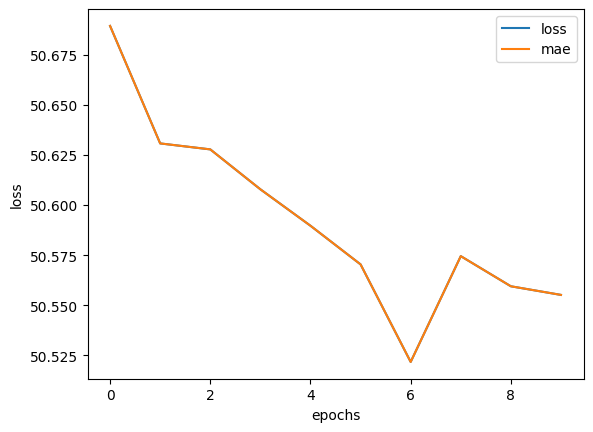

In [9]:
# Plotting the loss
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Improving the Model

* `Model 1` will have 3 additional hidden layers with 50 nodes each
* `Model 2` will be the same as Model 1 but run 50 epochs
* `Model 3` will run 50 epochs with no additional layers
* `Model 4` will have 2 additional hidden layers with 100 nodes each, run for 100 epochs, and use the Adam optimizer
* `Model 5` will have 5 additional hidden layers with 50 nodes each, run for 100 epochs, and use the Adam optimizer

In [9]:
# Model 1

# Set random seed
tf.random.set_seed(10)

# 1. Creating the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fitting the model
model_1_history = model_1.fit(alzheimer_train_expvar, diagnosis_train, epochs = 10, verbose = 0)

# Evaluating with test data
model_1.evaluate(alzheimer_test_expvar, diagnosis_test)

# Plotting the loss
pd.DataFrame(model_1_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Model 2

# Set random seed
tf.random.set_seed(10)

# 1. Creating the model
model_2  = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fitting the model
model_2_history = model_1.fit(alzheimer_train_expvar, diagnosis_train, epochs = 50, verbose = 0)

# Evaluating with test data
model_2.evaluate(alzheimer_test_expvar, diagnosis_test)

# Plotting the loss
pd.DataFrame(model_2_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Model 3

# Set random seed
tf.random.set_seed(10)

# 1. Creating the model
model_3 = tf.keras.Sequential([
    tf.keras.Dense(1)
])

# 2. Compiling the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fitting the model
model_3_history = model_3.fit(alzheimer_train_expvar, diagnosis_train, epochs  = 50, verbose = 0)

# Evaluating with test data
model_3.evaluate(alzheimer_test_expvar, diagnosis_test)

# Plotting the loss
pd.DataFrame(model_3_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Model 4

# Set random seed
tf.random.set_seed(10)

# 1. Creating the model
model_5 = tf.keras.Sequential([
    tf.keras.Dense(50),
    tf.keras.Dense(50),
    tf.keras.Dense(50),
    tf.keras.Dense(50),
    tf.keras.Dense(50),
    tf.keras.Dense(1)
])

# 2. Compiling the model
model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=.1), # Starting with a learning rate of .1, might be changed later if this model is the best of the 5
                metrics = ["mae"])

# 3. Fitting the model
model_5_history = model_5.fit(alzheimer_train_expvar, diagnosis_train, epochs = 100, verbose = 0)

# Evaluating with test data
model_5.evaluate(alzheimer_test_expvar, diagnosis_test)

# Plotting the loss
pd.DataFrame(model_5_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Model 5

# Set random seed
tf.random.set_seed(10)

# 1. Creating the model
model_4 = tf.keras.Sequential([
    tf.keras.Dense(100),
    tf.keras.Dense(100),
    tf.keras.Dense(1)
])

# 2. Compiling the model
model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=.1), # Starting with a learning rate of .1, might be changed later if this model is the best of the 5
                metrics = ["mae"])

# 3. Fitting the model
model_4_history = model_4.fit(alzheimer_train_expvar, diagnosis_train, epochs = 100, verbose = 0)

# Evaluating with test data
model_4.evaluate(alzheimer_test_expvar, diagnosis_test)

# Plotting the loss
pd.DataFrame(model_4_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")